<a href="https://colab.research.google.com/github/AdrianOjeda/clasificacion-inteligente-de-datos/blob/main/Kmeans/kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.1 Fundamentos de la técnica K-means**


K-means es un algoritmo de agrupamiento no supervisado que divide un conjunto de datos en un número predefinido, \(k\), de clústeres. La técnica funciona de manera iterativa: primero asigna cada punto de datos al centroide más cercano y, después, recalcula la posición de los centroides como el promedio de los puntos asignados a cada clúster. Este proceso se repite hasta que los centroides dejan de moverse o cambian mínimamente, convergiendo así en los clústeres finales.

Cada clúster se representa por un centroide (punto medio), y cada muestra se asigna al centroide más cercano. El algoritmo ajusta iterativamente los centroides para minimizar la suma de las distancias cuadradas entre cada punto y su centroide asignado.

### Algoritmo paso a paso

1. **Inicialización**: Se eligen \( k \) centroides iniciales (aleatorios o mediante heurísticas como K-Means++).
2. **Asignación**: Cada punto se asigna al clúster cuyo centroide esté más cercano.
3. **Actualización**: Se recalculan los centroides como la media de los puntos asignados a cada clúster.
4. **Iteración**: Se repiten los pasos 2 y 3 hasta que los centroides no cambien significativamente o se alcance un número máximo de iteraciones.

### Función objetivo

K-Means minimiza la siguiente función de costo:

$
J = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
$

Donde:
- $C_i$ es el conjunto de puntos asignados al clúster $i$
- $\mu_i$ es el centroide del clúster $i$
- $|x - \mu_i\|^2 \$ es la distancia euclidiana al cuadrado entre el punto x y su centroide.

A continuación explicaré con mas detenimiento el modelo matemático.

# **1.2 Modelo matemático**

Como ya se mencionó el algoritmo K-Means busca dividir un conjunto de datos en $k$ clústers, minimizando la variación interna de cada grupo. El objetivo es encontrar una asignación de puntos a clústers de tal forma que la distancia entre los puntos y sus respectivos centroides sea mínima.

### Definiciones

- Sea $X = \{x_1, x_2, \dots, x_n\}$ el conjunto de datos, donde cada $x_i \in \mathbb{R}^d$.
- Sea $k$ el número de clústers.
- Sea $C = \{C_1, C_2, \dots, C_k\}$ la partición de $X$ en $k$ subconjuntos.
- Sea $\mu_j$ el centroide del clúster $C_j$, calculado como la media de los puntos en ese clúster.

### Función objetivo

El algoritmo minimiza la suma de los errores cuadráticos intra-clúster (Within-Cluster Sum of Squares, WCSS):

$$
J = \sum_{j=1}^{k} \sum_{x_i \in C_j} \|x_i - \mu_j\|^2
$$

Donde:
- $\|x_i - \mu_j\|^2$ es la distancia euclidiana al cuadrado entre el punto $x_i$ y el centroide $\mu_j$.
- El objetivo es encontrar la partición $C$ y los centroides $\mu_j$ que minimicen $J$.

### Actualización de centroides

Cada centroide se recalcula como la media de los puntos asignados a su clúster:

$$
\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
$$

Cabe resaltar que la función objetivo $J$ no es convexa, por lo que el algoritmo puede converger a mínimos locales, también que La calidad de la solución depende de la inicialización de los centroides y que el algoritmo siempre converge, pero no garantiza encontrar el óptimo global.


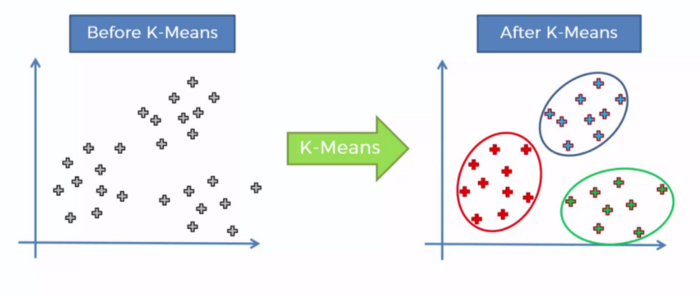

# **1.3 Librerias, clases y funciones**

Para implementar K means en python haremos uso de las siguientes librerias y metodos:

`sklearn.datasets.load_iris`


`pandas.DataFrame`


`sklearn.cluster.KMeans`


`matplotlib.pyplot`


`sklearn.metrics.adjusted_rand_score`

 Más adelante durante la implementación del codigo explicaré mas a profundidad para que usaremos cada una de las librerias. De mientras, asi es como pueden importar las librerias en sus proyectos:


```
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
```



# **1.4 Pipeline**

# 1.4.1 Preprocesamiento

Para nuestro ejemplo usaremos el dataset de iris, este dataset contiene 150 muestras de 3 especies de flores las cuales son:
- Iris setosa
- Iris versicolor
- Iris virginica

Antes de aplicar el algoritmo K-Means, haremos un análisis estadístico preliminar para entender la distribución de las variables:

- **Media (mean)**: Valor promedio de cada característica.
- **Desviación estándar (std)**: Medida de dispersión respecto a la media.
- **Mínimo (min)** y **Máximo (max)**: Valores extremos observados.

Este análisis permite identificar qué variables tienen mayor variabilidad y cuáles podrían ser más útiles para el agrupamiento.

Además, se genera un **gráfico de dispersión** entre `petal length (cm)` y `petal width (cm)`, que muestra una clara separación visual entre grupos, lo que sugiere que estas variables son buenas candidatas para aplicar K-Means.


In [1]:
# Importamos las librerías
import pandas as pd #Esta libreria la usaré para tabular los datos del Iris en un formato más manejable y visual.
import matplotlib.pyplot as plt #Se utiliza para crear gráficos de dispersión que visualizan los clústers y los centroides generados por K-Means.
from sklearn.datasets import load_iris # Carga el conjunto de datos Iris, ampliamente utilizado para clasificación y clustering. Devuelve un objeto tipo diccionario con datos, nombres de variables y etiquetas.


# Cargar dataset Iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Análisis estadístico básico
estadisticas = df.describe().loc[['mean', 'std', 'min', 'max']]
print("Resumen estadístico:\n")
print(estadisticas)


Resumen estadístico:

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean           5.843333          3.057333           3.758000          1.199333
std            0.828066          0.435866           1.765298          0.762238
min            4.300000          2.000000           1.000000          0.100000
max            7.900000          4.400000           6.900000          2.500000


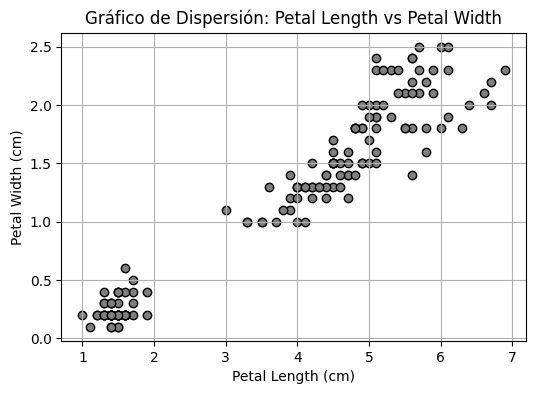

In [2]:
# Grafico de dispersión entre petal length y petal width
plt.figure(figsize=(6, 4))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c='gray', edgecolor='black')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Gráfico de Dispersión: Petal Length vs Petal Width')
plt.grid(True)
plt.show()


El grafico de dispersion resultante entre `petal length (cm)` y `petal width (cm)`, que muestra una clara separación visual entre grupos, lo que sugiere que estas variables son buenas candidatas para aplicar K-Means.


# 1.4.2 Prediction

Después del analisis estadístico y determinar que nuestro dataset es optimo para aplicar K means, crearemos una funcion de predicción para probar el modelo con nuevos datos y observar cómo los agrupa según los patrones aprendidos.


In [8]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

# Cargar datos
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Seleccionar variables para clustering
X_kmeans = df[['petal length (cm)', 'petal width (cm)']]

# Crear y entrenar el modelo
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_kmeans)

# Etiquetas asignadas
df['cluster'] = kmeans.labels_

# Esta es la funcion para predecir el cluster de un nuevo patrón
def predecir_clase(patron, modelo, nombres_clases):
    """
    Recibe un patrón (lista o array con dos valores: petal length y petal width),
    el modelo KMeans entrenado, y los nombres de las clases reales.
    Devuelve la clase predicha según el clúster asignado.
    """
    cluster = modelo.predict([patron])[0]
    clase = nombres_clases[cluster]
    print(f"Patrón: {patron}")
    print(f"Clúster asignado: {cluster}")
    print(f"Clase estimada: {clase}")
    return clase

patron_nuevo = [7.1, 1.8]  # petal length, petal width
predecir_clase(patron_nuevo, kmeans, ['setosa', 'versicolor', 'virginica'])


Patrón: [10, 10]
Clúster asignado: 0
Clase estimada: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


'setosa'

###1.4.3 Model Evaluation

Despues de crear la función de predicción, procedemos a evaluar el modelo y ver que tan preciso es, para eso usaremos dos metricas, la accuracy y la matriz de confusión.

Matriz de Confusión:
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]


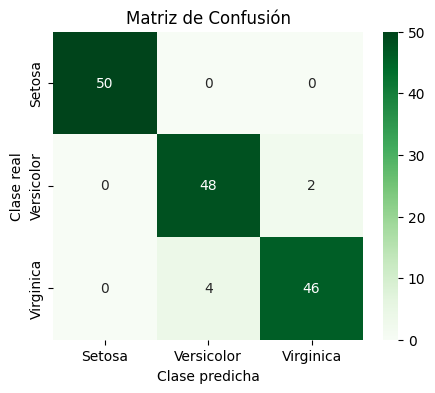

Accuracy del modelo: 0.96


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.optimize import linear_sum_assignment
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Etiquetas reales y etiquetas de clúster
y_true = load_iris().target
y_pred = df['cluster']

# Matriz de confusion sin reasignar
matriz_original = confusion_matrix(y_true, y_pred)

# Reasignación optima de clusters
row_ind, col_ind = linear_sum_assignment(-matriz_original)
mapping = dict(zip(col_ind, row_ind))
y_pred_reasignado = [mapping[label] for label in y_pred]

# Matriz de confusión
matriz_corregida = confusion_matrix(y_true, y_pred_reasignado)
print("Matriz de Confusión:")
print(matriz_corregida)

# Visualizacion
plt.figure(figsize=(5, 4))
sns.heatmap(matriz_corregida, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de Confusión')
plt.show()

# Accuracy corregida
accuracy = accuracy_score(y_true, y_pred_reasignado)
print(f"Accuracy del modelo: {accuracy:.2f}")

Una matriz con valores altos en la diagonal indica buena correspondencia entre clústers y clases reales.

Un valor de accuracy cercano a 1.0 sugiere que el modelo logró una agrupación muy precisa.

Como podemos observar, nuestra accuracy es del 96%, lo que indica que el algoritmo tiene una precisión bastante aceptable.

# **Referencias bibliograficas**


Latinx in AI. (2020, agosto 24). *Tutorial del algoritmo K-Means en Python*. Medium. https://medium.com/latinxinai/tutorial-del-algoritmo-k-means-en-python-d8055751e2f3

AI Made Simple. (2020, junio 30). *K-Means Clustering*. Medium. https://medium.com/ai-made-simple/k-means-clustering-e9bd722a09fa *italicized text*